<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/2023%EB%85%84_1%ED%95%99%EA%B8%B0(50%EC%A0%90)_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_4(%EC%A0%95%EB%8B%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#서울 열린 데이터광장 사이트에서 '서울시 지하철 역사정보'와 '서울시 지하철호선별 역별 승하차 인원 정보' 파일을 다운받아 아래와 같이 엑셀파일로 만들어 'seoul_subway.xlsx'로 저장하시오.
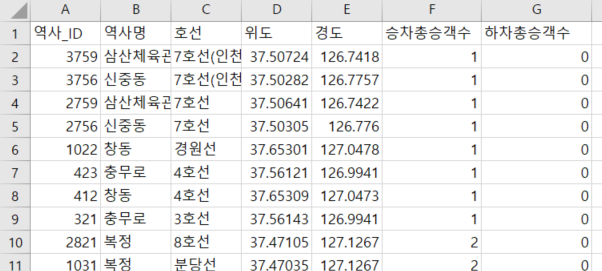

#문제1. 폰트설치(2점) 후 런타임-> 다시 시작할 것

In [21]:
#문제1번(2점)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf



Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 문제2. 데이터 분석 및 그래프, 지도 시각화를 위한 라이브러리를 호출(2점)

In [1]:
#문제2번(2점)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium




#문제3. #파일을 바로 업로드할 때(업로드는 1번만 실행할 것)

In [4]:
#문제3번(1점)

from google.colab import files
f = files.upload()



Saving seoul_wifi.xlsx to seoul_wifi.xlsx


#문제4. 서울의 지하철 역사의 위치와 승객수 현황 파일(seoul_subway.xlsx)을 판다스 라이브러리를 이용해 읽는다.(5점)

In [2]:
#문제4번(5점)

df = pd.read_excel('seoul_subway.xlsx', thousands = ',')
df


,역사_ID,역사명,호선,위도,경도,승차총승객수,하차총승객수
0,3759,삼산체육관,7호선(인천),37.507240,126.741790,1,0
1,3756,신중동,7호선(인천),37.502820,126.775660,1,0
2,2759,삼산체육관,7호선,37.506411,126.742153,1,0
3,2756,신중동,7호선,37.503048,126.775960,1,0
4,1022,창동,경원선,37.653007,127.047806,1,0
...,...,...,...,...,...,...,...
760,408,별내별가람,진접선,37.667780,127.115810,0,0
761,406,오남,진접선,37.705000,127.192810,0,0
762,405,진접,진접선,37.720500,127.203400,0,0
763,227,낙성대,2호선,37.476930,126.963693,0,0


In [4]:
df['총승객수']=df['승차총승객수']+df['하차총승객수']
df

,역사_ID,역사명,호선,위도,경도,승차총승객수,하차총승객수,총승객수
0,3759,삼산체육관,7호선(인천),37.507240,126.741790,1,0,1
1,3756,신중동,7호선(인천),37.502820,126.775660,1,0,1
2,2759,삼산체육관,7호선,37.506411,126.742153,1,0,1
3,2756,신중동,7호선,37.503048,126.775960,1,0,1
4,1022,창동,경원선,37.653007,127.047806,1,0,1
...,...,...,...,...,...,...,...,...
760,408,별내별가람,진접선,37.667780,127.115810,0,0,0
761,406,오남,진접선,37.705000,127.192810,0,0,0
762,405,진접,진접선,37.720500,127.203400,0,0,0
763,227,낙성대,2호선,37.476930,126.963693,0,0,0


In [6]:
name1=df.loc[df["총승객수"].idxmax()]
name2=df.loc[df["총승객수"].idxmin()]

# print(name1.역사명)
# print(name2.역사명)
print('지하철의 총승객수가 가장 많은 역은 %s역이고 가장 적은 역은 %s역입니다.'%(name1.역사명,name2.역사명))

강남
고촌
지하철의 총승객수가 가장 많은 역은 강남이고 가장 적은 역은 고촌입니다.


#문제5. 승차총승객수와 하차총승객수가 20000명이상인 역만 필터링하여 새로운 데이터프레임(df1)으로 만든다.(5점)


In [7]:
#문제5번(5점)
df1=df[(df['승차총승객수']>=20000) & (df['하차총승객수']>=20000)]

df1

,역사_ID,역사명,호선,위도,경도,승차총승객수,하차총승객수,총승객수
499,209,한양대,2호선,37.555273,127.043655,20325,24826,45151
501,2748,가산디지털단지,7호선,37.480338,126.882656,20505,23628,44133
502,1702,가산디지털단지,경부선,37.481581,126.882581,20505,23628,44133
503,1456,평촌,과천선,37.394287,126.963883,20534,20190,40724
505,1714,독산,경부선,37.466613,126.889249,20630,20676,41306
...,...,...,...,...,...,...,...,...
625,1293,홍대입구,경의중앙선,37.557641,126.926683,72531,82484,155015
626,1264,홍대입구,경의중앙선,37.557641,126.926683,72531,82484,155015
627,239,홍대입구,2호선,37.556790,126.923708,72531,82484,155015
628,4307,강남,신분당선,37.496837,127.028104,92836,91396,184232


#문제5. 승차총승객수 또는 하차총승객수가 20000명이상인 역만 필터링하여 새로운 데이터프레임(df1)으로 만든다.(5점)

In [8]:
#문제5번(5점)
df1=df[(df['승차총승객수']>=20000) | (df['하차총승객수']>=20000)]

df1

,역사_ID,역사명,호선,위도,경도,승차총승객수,하차총승객수,총승객수
408,1023,선릉,분당선,37.504856,127.048807,14486,22341,36827
409,220,선릉,2호선,37.504286,127.048203,14486,22341,36827
478,2732,강남구청,7호선,37.517179,127.041255,18515,20839,39354
479,1849,강남구청,분당선,37.517469,127.041151,18515,20839,39354
485,1751,산본,안산선,37.358101,126.933274,18781,20239,39020
...,...,...,...,...,...,...,...,...
625,1293,홍대입구,경의중앙선,37.557641,126.926683,72531,82484,155015
626,1264,홍대입구,경의중앙선,37.557641,126.926683,72531,82484,155015
627,239,홍대입구,2호선,37.556790,126.923708,72531,82484,155015
628,4307,강남,신분당선,37.496837,127.028104,92836,91396,184232


#문제5. 총승객수가 100000명이상인 역만 필터링하여 새로운 데이터프레임(df1)으로 만든다.(5점)

In [10]:
#문제5번(5점)
df1=df[df['총승객수']>=100000]

df1

,역사_ID,역사명,호선,위도,경도,승차총승객수,하차총승객수,총승객수
615,202,을지로입구,2호선,37.566014,126.982618,52453,53576,106029
616,228,서울대입구(관악구청),2호선,37.481247,126.952739,54848,51123,105971
617,1007,신도림,경부선,37.508787,126.891144,55466,52876,108342
618,234,신도림,2호선,37.508961,126.891084,55466,52876,108342
619,221,역삼,2호선,37.500622,127.036456,56733,64438,121171
620,219,삼성(무역센터),2호선,37.508844,127.063160,62246,62076,124322
621,4408,신림,신림선,37.484927,126.929616,64241,61234,125475
622,230,신림,2호선,37.484201,126.929715,64241,61234,125475
623,232,구로디지털단지,2호선,37.485266,126.901401,66046,64648,130694
624,4203,홍대입구,공항철도1호선,37.557438,126.926715,72531,82484,155015


#문제6. df1의 데이터 중 2호선 데이터만 추출하여 새로운 데이터프레임(df2)으로 만든다

In [11]:

df2=df1[df1['호선']=='2호선']
df2

,역사_ID,역사명,호선,위도,경도,승차총승객수,하차총승객수,총승객수
615,202,을지로입구,2호선,37.566014,126.982618,52453,53576,106029
616,228,서울대입구(관악구청),2호선,37.481247,126.952739,54848,51123,105971
618,234,신도림,2호선,37.508961,126.891084,55466,52876,108342
619,221,역삼,2호선,37.500622,127.036456,56733,64438,121171
620,219,삼성(무역센터),2호선,37.508844,127.063160,62246,62076,124322
622,230,신림,2호선,37.484201,126.929715,64241,61234,125475
623,232,구로디지털단지,2호선,37.485266,126.901401,66046,64648,130694
627,239,홍대입구,2호선,37.556790,126.923708,72531,82484,155015
629,222,강남,2호선,37.497990,127.027912,92836,91396,184232


In [12]:
name=df2.loc[df2['총승객수'].idxmax()].역사명
print('2호선의 승객수가 가장 많은 역은 %s역입니다'%(name))

2호선의 승객수가 가장 많은 역은 강남역입니다


#문제7. df의 데이터 중 호선별로 역의 개수를 세서 노선별로 개수가 많은 구부터 내림차순으로 정렬하여 새로운 데이터프레임(df3)으로 만든다.(5점)

In [21]:
#문제7번(5점)

df3=df.groupby('호선').count()
df3=df3.sort_values(by=['역사명'], ascending=[False])
df3


,역사_ID,역사명,위도,경도,승차총승객수,하차총승객수,총승객수
호선,,,,,,,
5호선,58,58,58,58,58,58,58
7호선,53,53,53,53,53,53,53
2호선,50,50,50,50,50,50,50
6호선,39,39,39,39,39,39,39
경부선,39,39,39,39,39,39,39
분당선,35,35,35,35,35,35,35
3호선,34,34,34,34,34,34,34
경의중앙선,31,31,31,31,31,31,31
인천1호선,30,30,30,30,30,30,30


#문제9. 위의 데이터프레임을 그래프로 그림처럼 시각화한다.(5점)
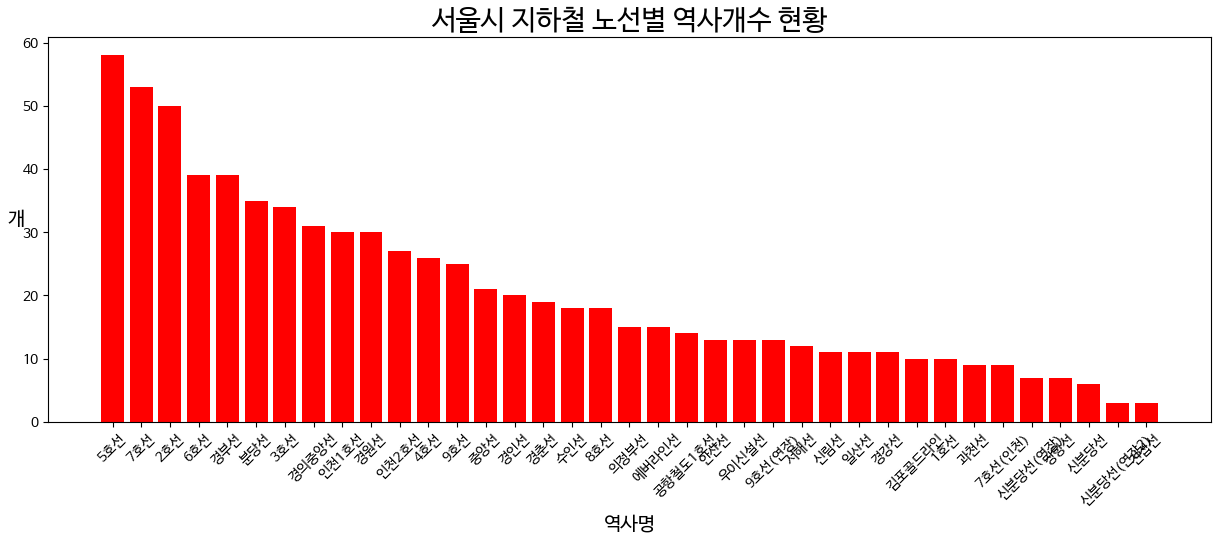

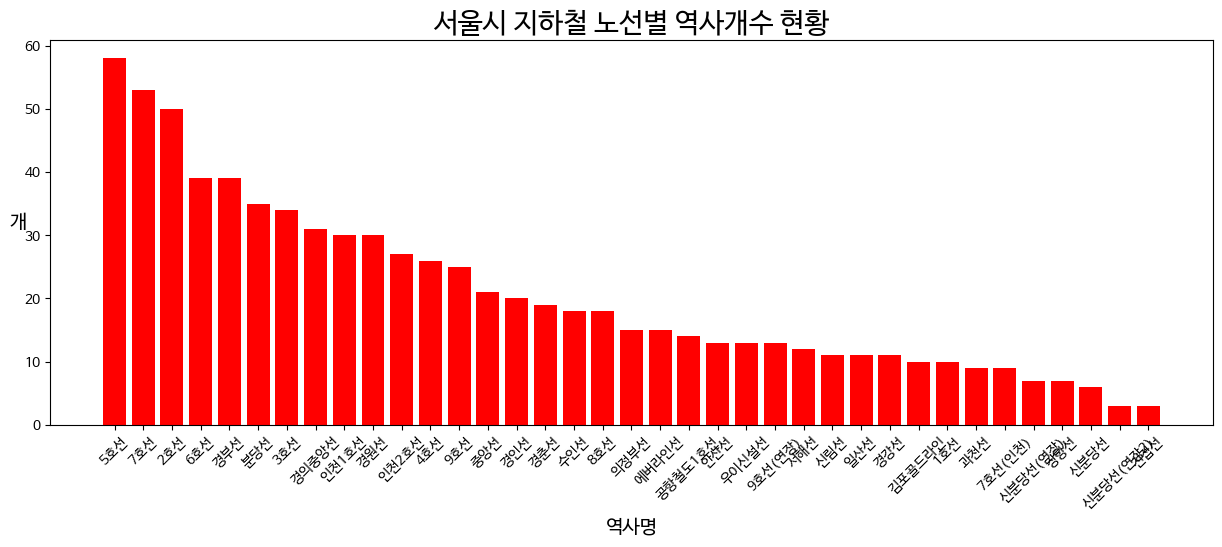

In [22]:
#문제9번(5점)

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(15, 5))
plt.bar(df3.index, df3['역사명'], color='red')

plt.title('서울시 지하철 노선별 역사개수 현황', fontsize=20)
plt.xlabel('역사명', fontsize=14)
plt.ylabel('개',rotation='horizontal',fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [23]:

df4=df.groupby('호선').sum('총승객수')
df4=df4.sort_values(by=['총승객수'], ascending=[False])
df4

,역사_ID,위도,경도,승차총승객수,하차총승객수,총승객수
호선,,,,,,
2호선,11275,1876.432094,6349.466177,1359844,1390142,2749986
5호선,162147,2177.583417,7367.090945,779235,777674,1556909
7호선,147061,1989.698999,6728.459780,690356,687649,1378005
경부선,61294,1454.230840,4952.505042,593353,583972,1177325
3호선,11067,1276.364604,4318.459285,590063,581894,1171957
4호선,10959,976.963588,3302.198057,475077,472426,947503
분당선,58407,1308.525739,4447.908448,459532,480780,940312
6호선,102570,1465.568134,4952.284273,436570,432878,869448
경의중앙선,39503,1167.258045,3932.390868,367293,364850,732143


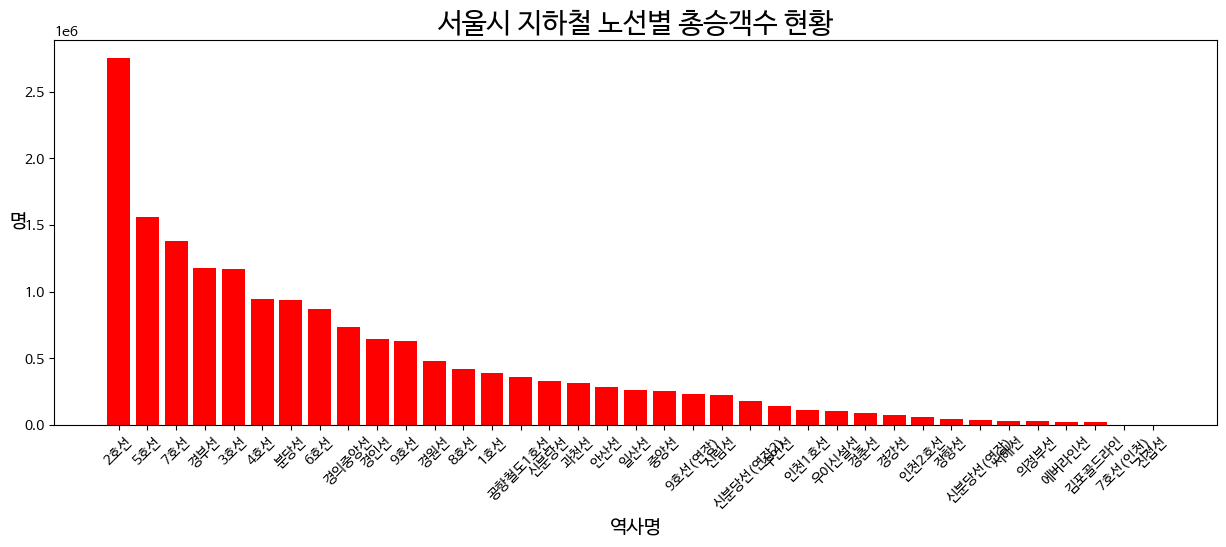

In [24]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(15, 5))
plt.bar(df4.index, df4['총승객수'], color='red')

plt.title('서울시 지하철 노선별 총승객수 현황', fontsize=20)
plt.xlabel('역사명', fontsize=14)
plt.ylabel('명',rotation='horizontal',fontsize=14)
plt.xticks(rotation=45)
plt.show()

#문제10. 승하차승객이 20000명이상인 데이터(df1)에서 원하는 지하철 노선의 이름을 입력받아 지하철 노선의 위치를 지도에 마커로 표시한다.(5점)

In [25]:
name=input('지하철 노선의 이름을 입력하세요')
df5=df1[df1['호선'].str.contains(name, na=False)]
df5

지하철 노선의 이름을 입력하세요2호선


,역사_ID,역사명,호선,위도,경도,승차총승객수,하차총승객수,총승객수
615,202,을지로입구,2호선,37.566014,126.982618,52453,53576,106029
616,228,서울대입구(관악구청),2호선,37.481247,126.952739,54848,51123,105971
618,234,신도림,2호선,37.508961,126.891084,55466,52876,108342
619,221,역삼,2호선,37.500622,127.036456,56733,64438,121171
620,219,삼성(무역센터),2호선,37.508844,127.063160,62246,62076,124322
622,230,신림,2호선,37.484201,126.929715,64241,61234,125475
623,232,구로디지털단지,2호선,37.485266,126.901401,66046,64648,130694
627,239,홍대입구,2호선,37.556790,126.923708,72531,82484,155015
629,222,강남,2호선,37.497990,127.027912,92836,91396,184232


#문제10. 데이터프레임(df5)의 위도, 경도 데이터를 이용하여 지도로 시각화한다.popup사용, zoom_start=12으로 할 것(10점)

#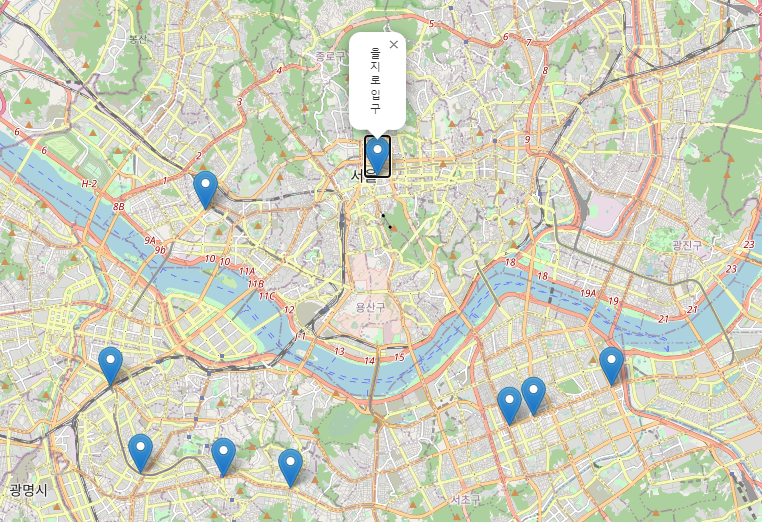

In [26]:
#문제10번(10점)

s_lat = df5.loc[df5.index[0], '위도']
s_lng = df5.loc[df5.index[0], '경도']

map = folium.Map(
    location=[s_lat,s_lng ], tiles ='OpenStreetMap' , zoom_start=12)

for idx in df5.index:

    lat = df5.loc[idx, '위도']
    lng = df5.loc[idx, '경도']
    name = df5.loc[idx, '역사명']
    folium.Marker(
        location=[lat, lng], 
				popup=name
    ).add_to(map)

map

